In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [4]:
# sklearn.datasets.make_blobs(n_samples=100, n_features=2, *, centers=None, 
# cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
# Generate isotropic Gaussian blobs for clustering.

In [5]:
x,y=make_blobs(n_samples=1000,n_features=2,centers=3, random_state=23)
# x--> Independent 
# y--> Dependent 
# Since it is unsupervised algo and there is no y; we ignore y here
# its just taken here because this make_blobs returns two outputs x & y

In [6]:
pd.DataFrame(x)

,0,1
0,-5.370391,3.475552
1,5.841612,-3.981830
2,1.761278,9.396963
3,-5.246640,5.602234
4,5.463128,-3.089388
...,...,...
995,-5.047968,3.186992
996,5.494799,-6.487077
997,6.141478,-5.754916
998,-5.453308,1.755996


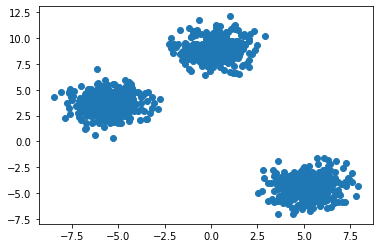

In [7]:
# create scatter plots of data samples
plt.scatter(x[:,0],x[:,1])

In [8]:
# It can be sene data is already availabe in form of clustered.
# using K-Means we shall provide labels to these clusters

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [10]:
# class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='auto', 
# max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
# K-Means clustering.

In [11]:
from sklearn.cluster import KMeans

In [12]:
# Manual Way:
# Elbow Method
# To select K value 
wcss=[]
clusters=range(2,11)
for i in clusters:
    km=KMeans(n_clusters=i,init="k-means++",random_state=23)
    km.fit(x_train)
    wcss.append(km.inertia_)
    
wcss
    

# # k-means++’ : selects initial cluster centroids using sampling based 
# on an empirical probability distribution of the points’ contribution 
# to the overall inertia. This technique speeds up convergence.
# The algorithm implemented is “greedy k-means++”. It differs 
# from the vanilla k-means++ by making several trials at each 
# sampling step and choosing the best centroid among them.


[7935.4372861454185,
 1319.2730531585607,
 1140.4677884655127,
 991.9047984051341,
 853.6417717909605,
 756.6338638085035,
 664.6728567267619,
 581.8442388253018,
 531.3846583938488]

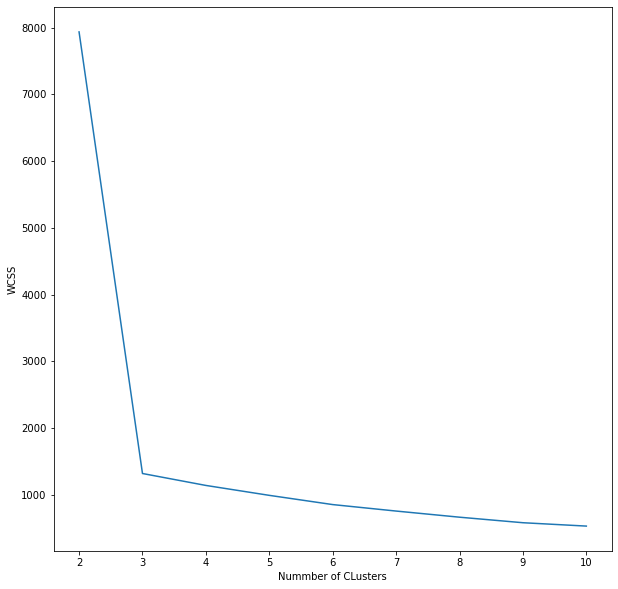

In [13]:
plt.figure(figsize=(10,10))
plt.plot(clusters,wcss)
plt.xlabel("Nummber of CLusters")
plt.ylabel("WCSS")
plt.show()


In [14]:
# It can be seen the elbow curve is getting stable at K=3

In [15]:
# How to find labels on Clusters
KM=KMeans(n_clusters=3,init="k-means++")

In [16]:
y_labels=KM.fit_predict(x_train)

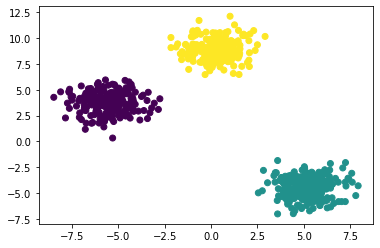

In [17]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)

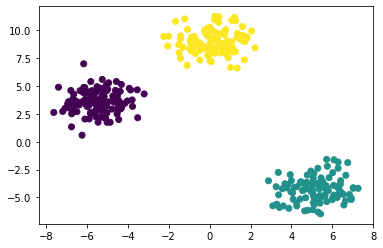

In [18]:
y_labels_test=KM.predict(x_test)
plt.scatter(x_test[:,0],x_test[:,1],c=y_labels_test)

In [19]:
# This is Manual Mode
# IF we want to automate this procedure
# Then Knee Locator library is used.

In [20]:
!pip install kneed

In [21]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(clusters,wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [23]:
# Performance Matrix
from sklearn.metrics import silhouette_score

In [26]:
ssc=[]
for i in clusters:
    km=KMeans(n_clusters=i,init="k-means++")
    km.fit(x_train)
    score=silhouette_score(x_train,km.labels_)
    ssc.append(score)
ssc

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.3399742579377459,
 0.3419446138284359,
 0.33940816350037584,
 0.3441987158239705,
 0.3422145778203239]

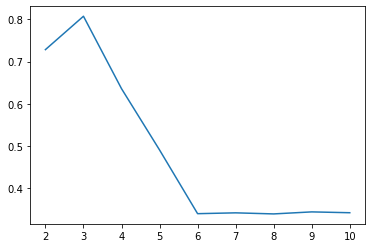

In [27]:
plt.plot(clusters,ssc)

In [ ]:
# The max value of score is obtained at k=3. So it also proves that calculated value of k is absolutely fine.
